## CLUSTERING

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Read Metadata.csv in a pandas Dataframe

In [2]:
#read the metadata.csv file using a relative path, setting the coloumn of dtypes of the pubmed_id, Microsoft Academic paper id, doi to string 
root_path = r'C:\Data606_Capstone\CORD-19'
metadata_path = f'{root_path}\metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})                               
meta_df.head()

C:\Users\laxmi\AppData\Local\Temp\ipykernel_6188\385906048.py:4: DtypeWarning: Columns (1,5,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv(metadata_path, dtype={


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909598 entries, 0 to 909597
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          909598 non-null  object 
 1   sha               316061 non-null  object 
 2   source_x          909598 non-null  object 
 3   title             909141 non-null  object 
 4   doi               528139 non-null  object 
 5   pmcid             328946 non-null  object 
 6   pubmed_id         416747 non-null  object 
 7   license           909598 non-null  object 
 8   abstract          691597 non-null  object 
 9   publish_time      909340 non-null  object 
 10  authors           888478 non-null  object 
 11  journal           849741 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  413615 non-null  object 
 14  arxiv_id          12223 non-null   object 
 15  pdf_json_files    316061 non-null  object 
 16  pmc_json_files    26

In [4]:
import random


In [5]:
#glob is returning the list of the file with extension.json in the relative path
all_json_long = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json_long)

716954

**Reference:** https://docs.python.org/3/library/glob.html

In [38]:
all_json = random.choices(all_json_long, k=10000)
len(all_json)

10000

**Reference:** https://docs.python.org/3/library/random.html#random.choices

In [8]:
#class to reads a JSON file and extracts the paper ID, abstract, and body text from its content.
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for txt in content['abstract']:
                self.abstract.append(txt['text'])
            # Body text
            for txt in content['body_text']:
                self.body_text.append(txt['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

67579d5de256841464d18177fd14c7fbddc17be6: Background: This antimicrobial surveillance study reports in vitro antimicrobial activity and susceptibility data for a panel of agents against respiratory isolates of Enterobacterales and Pseudomonas... Antimicrobial resistance among Gram-negative bacteria is a long-standing problem that needs to be monitored in an effort to preserve the efficacy of current antimicrobial agents. Pseudomonas aeruginos...


**Reference:** 
1. json load: https://docs.python.org/3/library/json.html#json.load
1. https://www.mathworks.com/matlabcentral/answers/513514-how-to-extract-text-from-json-files-and-combine-them
1. https://www.geeksforgeeks.org/read-write-and-parse-json-using-python/
1. _repr_(string representattion):https://docs.python.org/3/reference/datamodel.html#object.__repr
1. https://stackoverflow.com/questions/58530935/cant-getting-the-implementation-of-repr-method-in-python



In [9]:
#function to format text by inserting line breaks at predetermined intervals to produce lines of a certain length.
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # adding break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

**Reference:** https://stackoverflow.com/questions/10491223/how-can-i-turn-br-and-p-into-line-breaks

In [10]:
#read the articles into an accessible DataFrame
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:   #this gives periodic update on the progress of the loop
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # for invalid paper format or unreadbale file, skip and continue for next iteration
    
     # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
     # no metadata, skip this paper
    if len(meta_data) == 0:
         continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    #extracting author information from metadata and creating a column called 'authors' in the dictionary 'dict_'
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null value
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided then original title value is appended to the dictionary without formatting.
    except Exception as e:  
        dict_['title'].append(meta_data['title'].values[0])  
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 10000
Processing index: 1000 of 10000
Processing index: 2000 of 10000
Processing index: 3000 of 10000
Processing index: 4000 of 10000
Processing index: 5000 of 10000
Processing index: 6000 of 10000
Processing index: 7000 of 10000
Processing index: 8000 of 10000
Processing index: 9000 of 10000


,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,8fc8e71aea3e63776d3ef0fde7579cf0440720f1,10.1186/s12913-021-07261-y,Background: Measures to manage the COVID-19 pa...,Conclusion: Our study demonstrates the impacts...,"Hoerold, Madlen. Gottschalk, Marc. Debbeler...",Healthcare professionals’ perceptions of<br>i...,BMC Health Serv Res,Background: Measures to manage the COVID-19<b...
1,67579d5de256841464d18177fd14c7fbddc17be6,10.1186/s12879-021-06153-0,Background: This antimicrobial surveillance st...,Antimicrobial resistance among Gram-negative b...,"Piérard, D.. Stone, G. G.",In vitro antimicrobial susceptibility of<br>c...,BMC Infect Dis,Background: This antimicrobial surveillance<b...
2,0cf205cc39101f5a503a8e2cbe8e899408d0d082,10.1038/nrg2968,| RNA interference (RNAi) is a powerful approa...,RNA interference (RNAi) is a natural cellular ...,"Davidson, Beverly L.. McCray, Paul B.",Current prospects for RNA interference-based<...,Nat Rev Genet,| RNA interference (RNAi) is a powerful<br>ap...
3,ac7a5fed452b38f471bb9c6377e35df572b47d55,10.1016/j.micinf.2020.08.006,The Envelope (E) protein of SARS-CoV-2 is the ...,abundantly expressed inside the infected cell ...,"De Maio, Flavio. Lo Cascio, Ettore. Babini,...",Improved binding of SARS-CoV-2 Envelope<br>pr...,Microbes Infect,The Envelope (E) protein of SARS-CoV-2 is the...
4,63d396a628c4595deefcca39bf5e8553932274d9,10.1183/13993003.01154-2020,,The new severe acute respiratory syndrome coro...,"Guy, Tiphaine. Créac'hcadec, Audrey. <br>Ric...","High-flow nasal oxygen: a safe, efficient<br>...",Eur Respir J,Not provided.


In [12]:
df_covid['abstract'].describe(include='all')

count     4009
unique    2817
top           
freq      1165
Name: abstract, dtype: object

In [13]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     3971
unique    2817
top           
freq      1149
Name: abstract, dtype: object

In [14]:
df_covid['body_text'].describe(include='all')

count                                                  3971
unique                                                 3971
top       Conclusion: Our study demonstrates the impacts...
freq                                                      1
Name: body_text, dtype: object

In [15]:
df_covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 4008
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          3971 non-null   object
 1   doi               3836 non-null   object
 2   abstract          3971 non-null   object
 3   body_text         3971 non-null   object
 4   authors           3933 non-null   object
 5   title             3971 non-null   object
 6   journal           3611 non-null   object
 7   abstract_summary  3971 non-null   object
dtypes: object(8)
memory usage: 279.2+ KB


In [16]:
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,8fc8e71aea3e63776d3ef0fde7579cf0440720f1,10.1186/s12913-021-07261-y,Background: Measures to manage the COVID-19 pa...,Conclusion: Our study demonstrates the impacts...,"Hoerold, Madlen. Gottschalk, Marc. Debbeler...",Healthcare professionals’ perceptions of<br>i...,BMC Health Serv Res,Background: Measures to manage the COVID-19<b...
1,67579d5de256841464d18177fd14c7fbddc17be6,10.1186/s12879-021-06153-0,Background: This antimicrobial surveillance st...,Antimicrobial resistance among Gram-negative b...,"Piérard, D.. Stone, G. G.",In vitro antimicrobial susceptibility of<br>c...,BMC Infect Dis,Background: This antimicrobial surveillance<b...
2,0cf205cc39101f5a503a8e2cbe8e899408d0d082,10.1038/nrg2968,| RNA interference (RNAi) is a powerful approa...,RNA interference (RNAi) is a natural cellular ...,"Davidson, Beverly L.. McCray, Paul B.",Current prospects for RNA interference-based<...,Nat Rev Genet,| RNA interference (RNAi) is a powerful<br>ap...
3,ac7a5fed452b38f471bb9c6377e35df572b47d55,10.1016/j.micinf.2020.08.006,The Envelope (E) protein of SARS-CoV-2 is the ...,abundantly expressed inside the infected cell ...,"De Maio, Flavio. Lo Cascio, Ettore. Babini,...",Improved binding of SARS-CoV-2 Envelope<br>pr...,Microbes Infect,The Envelope (E) protein of SARS-CoV-2 is the...
4,63d396a628c4595deefcca39bf5e8553932274d9,10.1183/13993003.01154-2020,,The new severe acute respiratory syndrome coro...,"Guy, Tiphaine. Créac'hcadec, Audrey. <br>Ric...","High-flow nasal oxygen: a safe, efficient<br>...",Eur Respir J,Not provided.


In [17]:
df_covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 4008
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          3971 non-null   object
 1   doi               3836 non-null   object
 2   abstract          3971 non-null   object
 3   body_text         3971 non-null   object
 4   authors           3933 non-null   object
 5   title             3971 non-null   object
 6   journal           3611 non-null   object
 7   abstract_summary  3971 non-null   object
dtypes: object(8)
memory usage: 279.2+ KB


**VECTORIZATION**

Now that we have pre-processed the data, it is time to convert it into a format that can be handled by our algorithms. For this purpose we will be using tf-idf. This will convert our string formatted data into a measure of how important each word is to the instance out of the literature as a whole.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)#calculates the TF-IDF values and returns a sparse matrix
    return X

**Reference:** 
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
1. https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [37]:
text = df_covid['body_text'].values


In [23]:
X = vectorize(text, 2 ** 12)
X.shape

(3971, 4096)

**PCA** *(Pricipal Compenent Analysis)*: A technique for reducing the dimensionality of data and improvising the data visualization

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=100)
X_reduced= pca.fit_transform(X.toarray()) #convert from sparse matrix to dense matrix
X_reduced.shape

(3971, 1671)

**Reference:** 
1. https://builtin.com/machine-learning/pca-in-python
1. https://www.jcchouinard.com/pca-with-python/

In [26]:
from sklearn.cluster import KMeans
# from sklearn.cluster import kmeans_plusplus


**K-MEANS CLUSTERING**

In [27]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = [i for i in range(2, 20, 4)]
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\clust

**Reference: ** https://avidml.wordpress.com/2016/10/29/easily-understand-k-means-clustering/

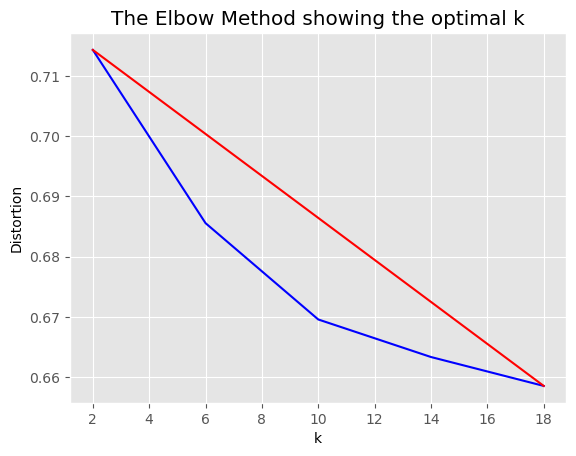

In [28]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Reference:** https://stackabuse.com/k-means-clustering-with-the-elbow-method/

In [29]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df_covid['y'] = y_pred

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Dimensionality Reduction with t-SN**

Using t-SNE we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the body_text can be plotted.

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 3971 samples in 0.031s...
[t-SNE] Computed neighbors for 3971 samples in 1.467s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3971
[t-SNE] Computed conditional probabilities for sample 2000 / 3971
[t-SNE] Computed conditional probabilities for sample 3000 / 3971
[t-SNE] Computed conditional probabilities for sample 3971 / 3971
[t-SNE] Mean sigma: 0.236536
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.433670
[t-SNE] KL divergence after 1000 iterations: 1.817354


C:\Users\laxmi\AppData\Local\Temp\ipykernel_6188\1717775349.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)


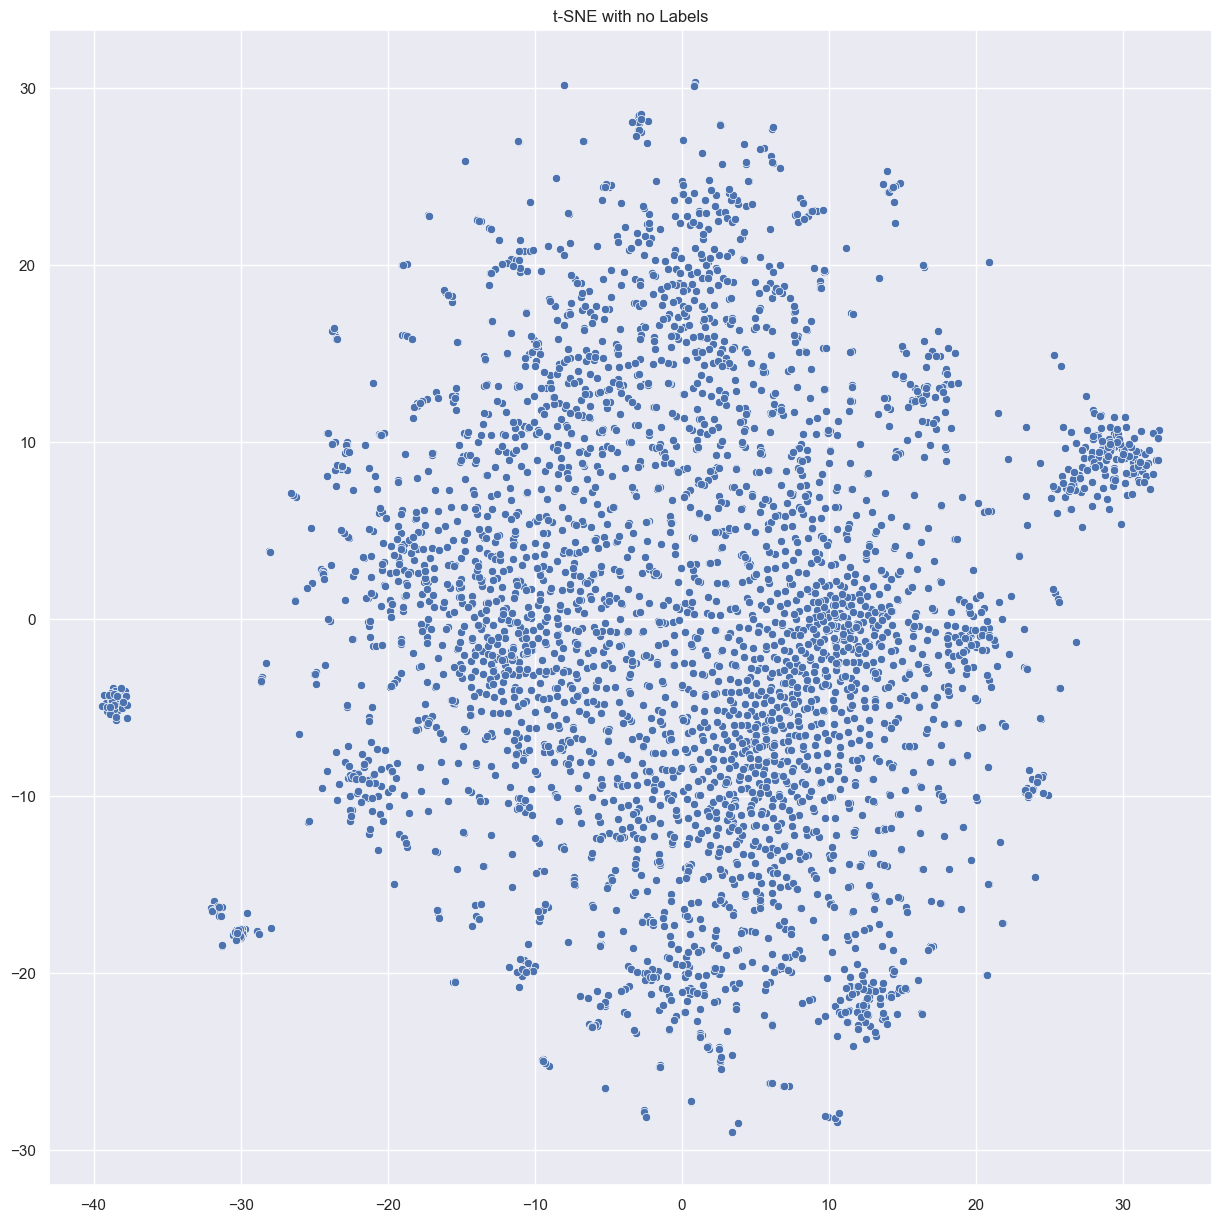

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)
df_covid['x_axis'] = X_embedded[:,0]
df_covid['y_axis'] = X_embedded[:,1]
plt.title('t-SNE with no Labels')
plt.show()

C:\Users\laxmi\AppData\Local\Temp\ipykernel_6188\2787805565.py:12: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)


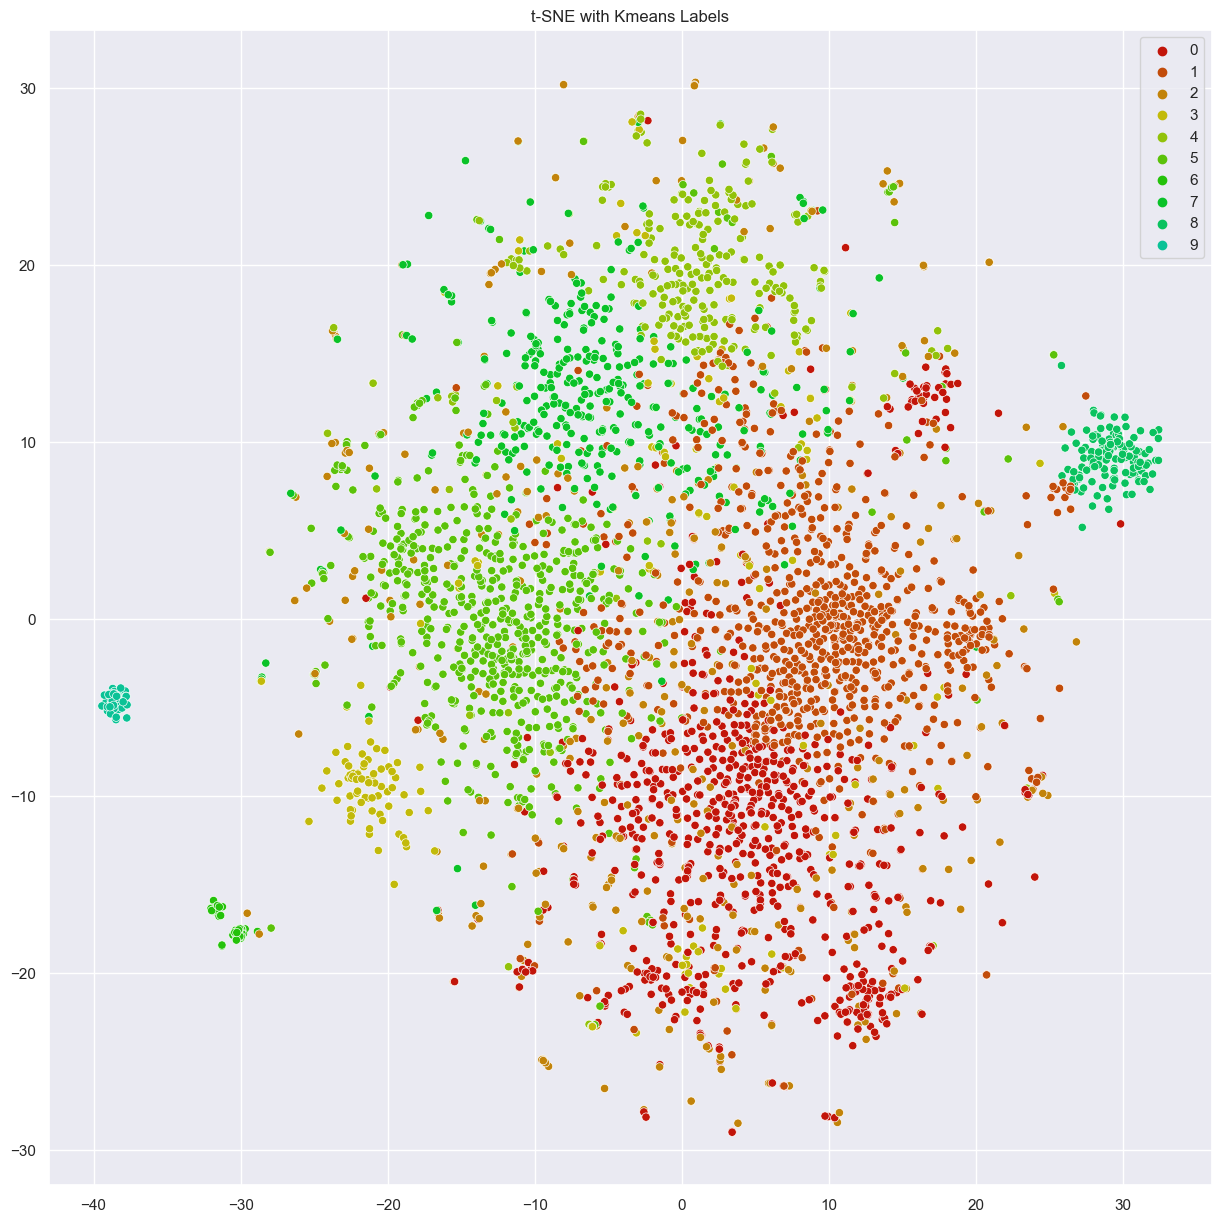

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
# plt.savefig("plots/improved_cluster_tsne.png")
plt.show()

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score


# Calculate calinski harabasz score
calinski_harabasz_avg = calinski_harabasz_score(X_reduced, y_pred)

# Print the calinski harabasz score
print("The average calinski harabasz score is:", calinski_harabasz_avg)


The average calinski harabasz score is: 76.02257135876745


**Reference:** https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


# Calculate davies bouldin score
davies_bouldin_avg = davies_bouldin_score(X_reduced, y_pred)

# Print the davies bouldin score
print("The average davies bouldin score is:", davies_bouldin_avg)


The average davies bouldin score is: 4.2089997567422195


**Reference:** https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [47]:
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from sklearn.cluster import KMeans
import numpy as np
from bokeh.models import ColumnDataSource, HoverTool, Select, Div
from bokeh.layouts import column, row
from bokeh.palettes import Spectral10

# Create color map based on cluster labels
color_map = [Category10[10][i] for i in kmeans.labels_]
source = ColumnDataSource(data=dict(x=X_embedded[:,0], y=X_embedded[:,1], color=color_map, title = df_covid['title'], text = df_covid['abstract_summary']))

# Create hover tool to show body_text on hover
hover = HoverTool(tooltips=[("Title", "@title"), ("Abstract", "@text")])

# Create scatter plot
plot = figure(title="10 Clusters", x_axis_label='X', y_axis_label='Y', tools=[hover])
plot.scatter(x='x', y='y', color='color', source=source)

# Show plot
show(plot)

**Reference:** https://docs.bokeh.org/en/2.4.1/docs/user_guide/plotting.html